In [12]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Dataset C.csv")
x = df['X'].values
y = df['Y'].values


In [13]:
def mse_loss(params, x, y): 
    m, c = params 
    y_hat = m * x + c 
    mse=(y-y_hat)*(y-y_hat)
    return np.mean(mse)

In [14]:
def mae_loss(params, x, y): 
    m, c = params 
    y_hat = m * x + c 
    mae=abs(y-y_hat)
    return np.mean(mae)

In [15]:
initial_guess = [0, 0] 
result_mse = minimize(mse_loss, initial_guess, args=(x, y)) 
m_mse, c_mse = result_mse.x 

initial_guess = [0, 0] 
result_mae = minimize(mae_loss, initial_guess, args=(x, y)) 
m_mae, c_mae = result_mae.x 

In [16]:
def analyze_line(x, y, m, c): 
    y_pred = m * x + c 
    residuals = y - y_pred
    return residuals

In [17]:
m=0
n=0
mr=np.ones(2000)
nr=np.ones(2000)
p=list(range(0,2000))
r=analyze_line(x,y,m_mae,c_mae)
print(r)
for i in p:
    if r[i]>0:
        m=m+1
        mr[i]=r[i]
    if r[i]<0:
        n=n+1
        nr[i]=r[i]

[ 0.68899787 -0.26349789  0.91540328 ... -1.43496822 -0.35678477
 -1.22956637]


In [18]:
meanAboveResi=np.mean(mr)
meanAboveResi

np.float64(1.4538530462841153)

In [19]:
meanBelowResi=np.mean(nr)
meanBelowResi

np.float64(-0.09310260880959408)

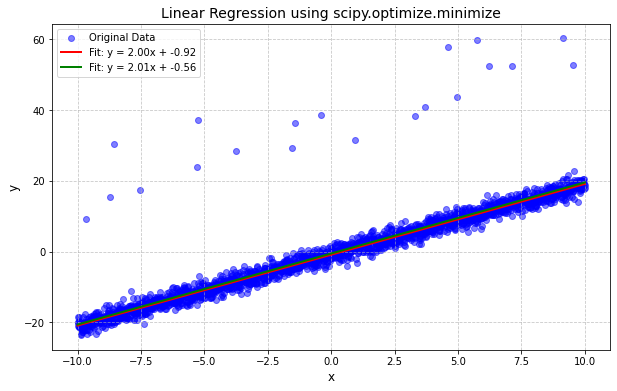

In [20]:
y_pred=m_mae*x+c_mae
y_pred1=m_mse*x+c_mse
plt.figure(figsize=(10,6))
plt.scatter(x,y,color="blue",alpha=0.5,label='Original Data')
plt.plot(x, y_pred, color='red', linewidth=2, label=f'Fit: y = {m_mae:.2f}x + {c_mae:.2f}') 
plt.plot(x, y_pred1, color='green', linewidth=2, label=f'Fit: y = {m_mse:.2f}x + {c_mse:.2f}') 
plt.title('Linear Regression using scipy.optimize.minimize', fontsize=14) 
plt.xlabel('x', fontsize=12) 
plt.ylabel('y', fontsize=12) 
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [21]:
l=0
k=0
l1=0
k1=0
for i in p:
    if y_pred[i]>y[i]:
        k=k+1
    if y_pred[i]<y[i]:
        l=l+1
for i in p:
    if y_pred1[i]>y[i]:
        k1=k1+1
    if y_pred1[i]<y[i]:
        l1=l1+1
print("MAE counts above line {}".format(l))
print("MAE counts below line {}".format(k))
print("MSE counts above line {}".format(l1))
print("MSE counts below line {}".format(k1))

MAE counts above line 999
MAE counts below line 1001
MSE counts above line 797
MSE counts below line 1203


In [22]:
import statistics
L=list(range(0,2000))
K=list(range(0,2000))
L1=list(range(0,2000))
K1=list(range(0,2000))
for i in p:
    K[i]=0
    L[i]=0
    if y_pred[i]>y[i]:
        K[i]=(abs(y_pred[i]-y[i]))   
    if y_pred[i]<y[i]:
        L[i]=(abs(y_pred[i]-y[i]))
for i in p:
    K1[i]=0
    L1[i]=0
    if y_pred1[i]>y[i]:
        K1[i]=(abs(y_pred1[i]-y[i]))
    if y_pred1[i]<y[i]:
        L1[i]=(abs(y_pred1[i]-y[i]))
print("MAE mean distance above line {}".format(statistics.mean(L)))
print("MAE mean distance below line {}".format(statistics.mean(K)))
print("MSE mean distance above line {}".format(statistics.mean(L1)))
print("MSE mean distance below line {}".format(statistics.mean(K1)))

MAE mean distance above line 0.9533530462841153
MAE mean distance below line 0.592602608809594
MSE mean distance above line 0.7915731702483101
MSE mean distance below line 0.7915730796774867
